<h1 align=center><font size = 5> SVM & SVR with Python</font></h1>

In this notebook we try to practice all the classification algorithms.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

## Import Libraries

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

### About dataset

This dataset is about Biological species. The iris.csv data set is a small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are not linearly separable from each other

It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| sepal length    |    Iris Setosa, Iris Versicolour, or Iris Virginica                                           |
| sepal width	      |  Iris Setosa, Iris Versicolour, or Iris Virginica|
| petal length          |  Iris Setosa, Iris Versicolour, or Iris Virginica|
| petal width	|  Iris Setosa, Iris Versicolour, or Iris Virginica |

## Get the Data

There are two ways to get the data

- Step-1 : directly from the UCI ML Repository
- Step-2 : Fetch the data from the csv file (recommended)

### Step-1

### About dataset

In [2]:
#https://archive.ics.uci.edu/dataset/53/iris
!pip install ucimlrepo


  Using cached ucimlrepo-0.0.3-py3-none-any.whl.metadata (5.2 kB)
Using cached ucimlrepo-0.0.3-py3-none-any.whl (7.0 kB)


In [3]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
iris = fetch_ucirepo(id=53) 

==========================================================

In [6]:
iris

{'data': {'ids': None,
  'features':      sepal length  sepal width  petal length  petal width
  0             5.1          3.5           1.4          0.2
  1             4.9          3.0           1.4          0.2
  2             4.7          3.2           1.3          0.2
  3             4.6          3.1           1.5          0.2
  4             5.0          3.6           1.4          0.2
  ..            ...          ...           ...          ...
  145           6.7          3.0           5.2          2.3
  146           6.3          2.5           5.0          1.9
  147           6.5          3.0           5.2          2.0
  148           6.2          3.4           5.4          2.3
  149           5.9          3.0           5.1          1.8
  
  [150 rows x 4 columns],
  'targets':               class
  0       Iris-setosa
  1       Iris-setosa
  2       Iris-setosa
  3       Iris-setosa
  4       Iris-setosa
  ..              ...
  145  Iris-virginica
  146  Iris-virginica
  147  

### Step-2

In [80]:
df = pd.read_csv('Iris.csv')

In [4]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

# Data visualization and pre-processing


Let’s see how many unique values are there in our data set 

In [5]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Lets plot some columns to underestand data better:

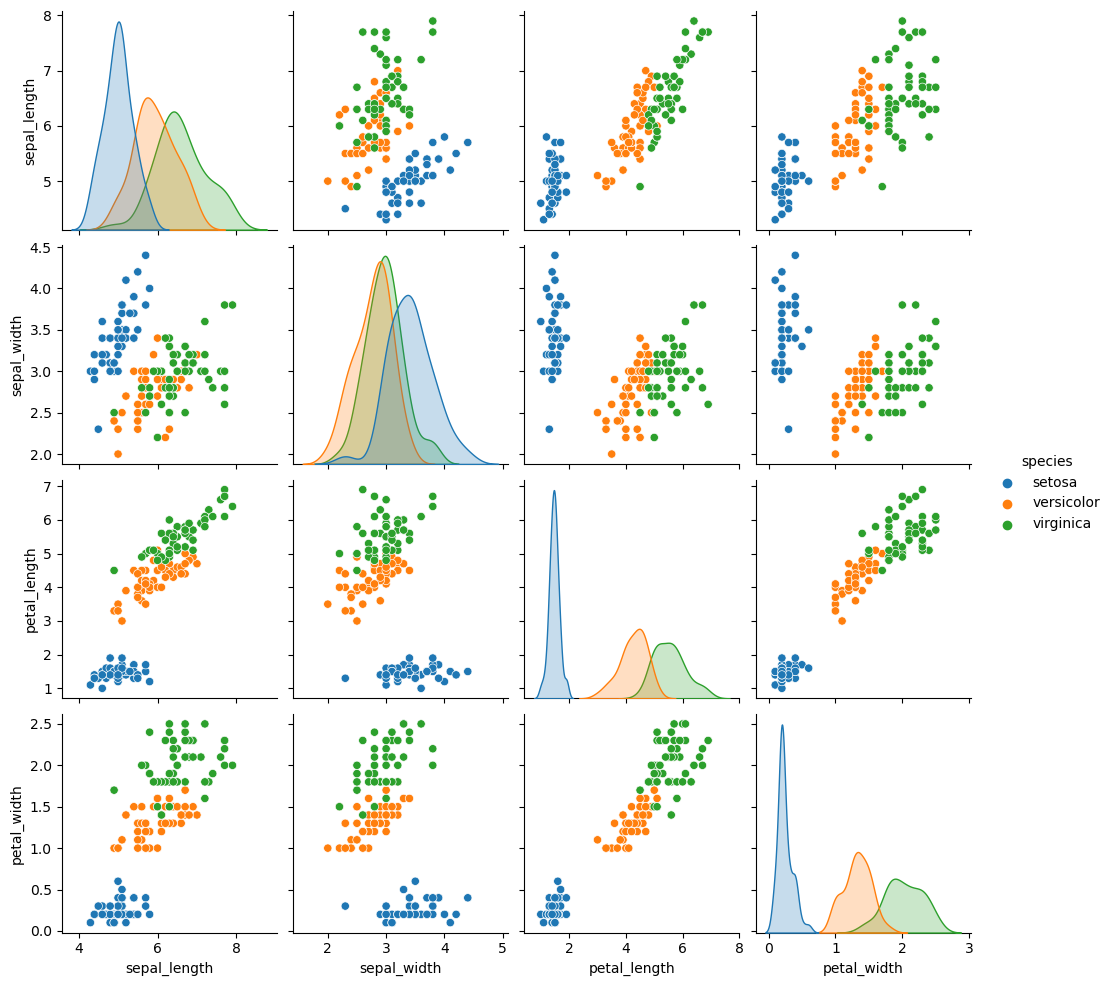

In [6]:
sns.pairplot(df, hue='species')

Observing the above pairwise plots we can infer the following:

- the setosa and versicolor data points quite well distributed for sepal_length
- the setosa and versicolor data points quite well distributed for sepal_width
- the versicolor and virginica data points are overlapping hece classification may be tough to predict

# Pre-processing:  Feature selection/extraction

Convert Categorical features to numerical values

Lets assign labels to the species names

| Species          | Label  |
|----------------|---------------------------------------------------------------------------------------|
| Iris Setosa             |  0|
| Iris Versicolour	      |  1|
| Iris Virginica          |  2|


In [107]:
df['species'] = df['species'].map({"setosa":0,"versicolor":1,"virginica":2})

Features in to independent and dependent feature

Linear Regression solves for binary classification problems.

Here we have a multi-class classification problem.

We will first convert the multi-class classification problem to a binary problem by removing the 'virginica' class species.

In [109]:
df['species'].unique()

array([0, 1, 2], dtype=int64)

In [110]:
df[df['species']!=2]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [112]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [113]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [114]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [98]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [99]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: species, Length: 120, dtype: int64

# Classification 

Now, it is turn to, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
The following algorithms will be used:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: One should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __iris.csv__ for finding the best k, however, you can split your train_iris.csv into train and test to find the best __k__.

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


In [117]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=3)

In [121]:
yhat

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2], dtype=int64)

In [122]:
yhat[0:5]

array([2, 0, 2, 2, 2], dtype=int64)

In [123]:
# just for sanity chaeck
yhat = kNN_model.predict(X_test)
yhat[0:]

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2], dtype=int64)

In [129]:
# Best k
Ks=7
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.93333333, 0.93333333, 0.96666667, 0.96666667, 0.96666667,
       0.96666667])

In [130]:
# Building the model again, using k=7
from sklearn.neighbors import KNeighborsClassifier
k = 7
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=7)

# Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [132]:
yhat = DT_model.predict(X_test)
yhat

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2], dtype=int64)

# Support Vector Machine

In [133]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 

SVC()

In [134]:
yhat = SVM_model.predict(X_test)
yhat

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2], dtype=int64)

# Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()

In [136]:
from sklearn.model_selection import GridSearchCV

parameter= {'C':[0.5,1.0,2.0,3.0,4.0,5.25,6.2,7.3,8.4,9.1,10.0,30,45],'penalty':['l1', 'l2', 'elasticnet']}

log_regression= GridSearchCV(regression, parameter,scoring='accuracy',cv=5)
log_regression.fit(X,y)

c:\Users\Sumit\anaconda3\envs\eqalgo\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Sumit\anaconda3\envs\eqalgo\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1.0, 2.0, 3.0, 4.0, 5.25, 6.2, 7.3, 8.4,
                               9.1, 10.0, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [137]:
yhat = log_regression.predict(X_test)
yhat

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2], dtype=int64)

# Model Evaluation

In [142]:

from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score
#from sklearn.metrics import accuracy_score, confusion_matrix, jaccard_score

In [150]:
knn_yhat = kNN_model.predict(X_test)
#print("KNN Jaccard index: %.2f" % jaccard_score)
print(f1_score)

<function f1_score at 0x000001B0F43715E0>


___

In [75]:
print(log_regression.best_params_)

{'C': 7.3, 'penalty': 'l2'}


In [76]:
print(log_regression.best_score_)

0.9800000000000001


Now using the X_test will try to predict the outcome

In [68]:
prediction_log = log_regression.predict(X_test)

In [69]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


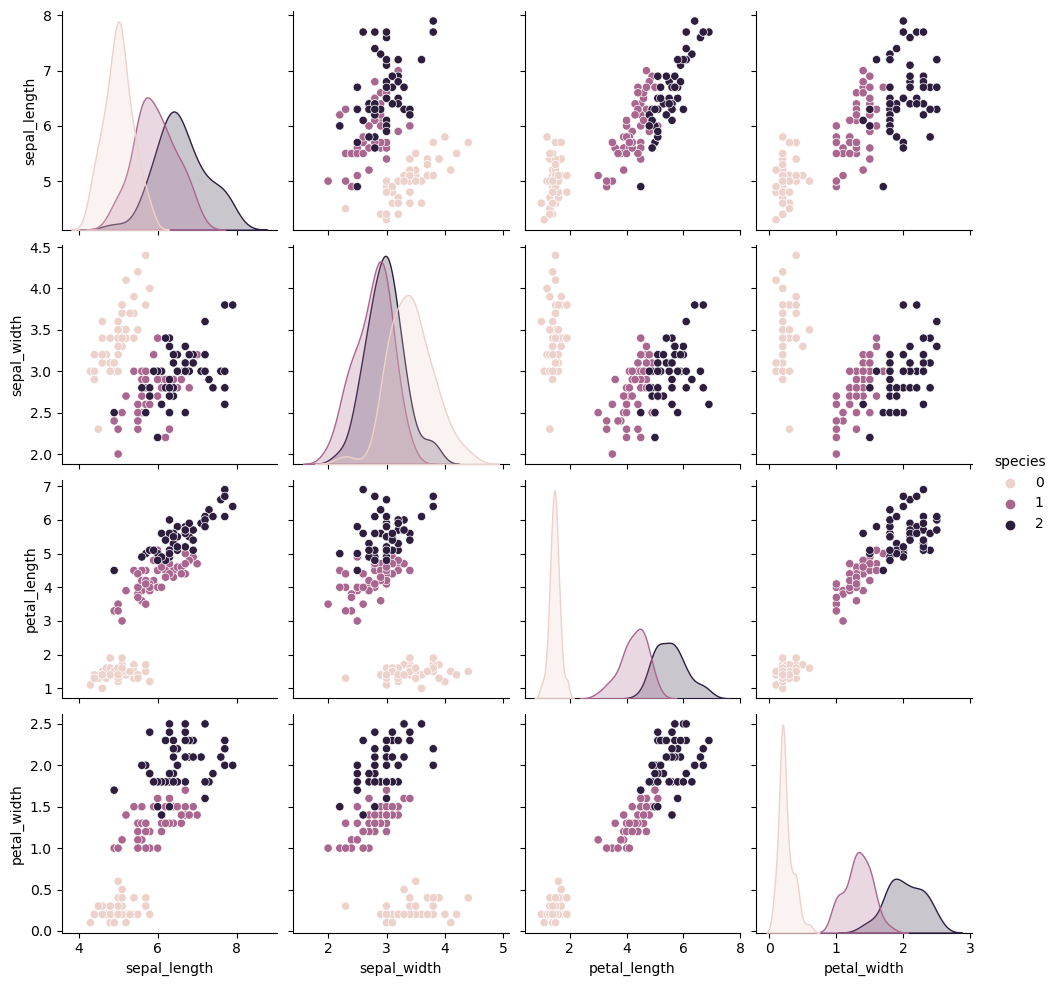

In [79]:
sns.pairplot(df, hue='species')

In [140]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_auc_score, fbeta_score, jaccard_score

In [72]:
confusion_matrix(y_test, prediction_log)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)